In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objs as go

In [2]:
# reading a csv file containing well names and UTM coordenates:
header = ['Well_Name', 'UTM_E', 'UTM_N']
data = pd.read_csv('../data/Coordenadas_MP.csv', sep=',', names=header, header=0)
#data

In [3]:
#creating a dictionary to save the values of each columns:
coord={}
for i in range (np.shape(data)[1]):
    dicio = {header[i]: list(data[header[i]].values)}
    coord.update(dicio)

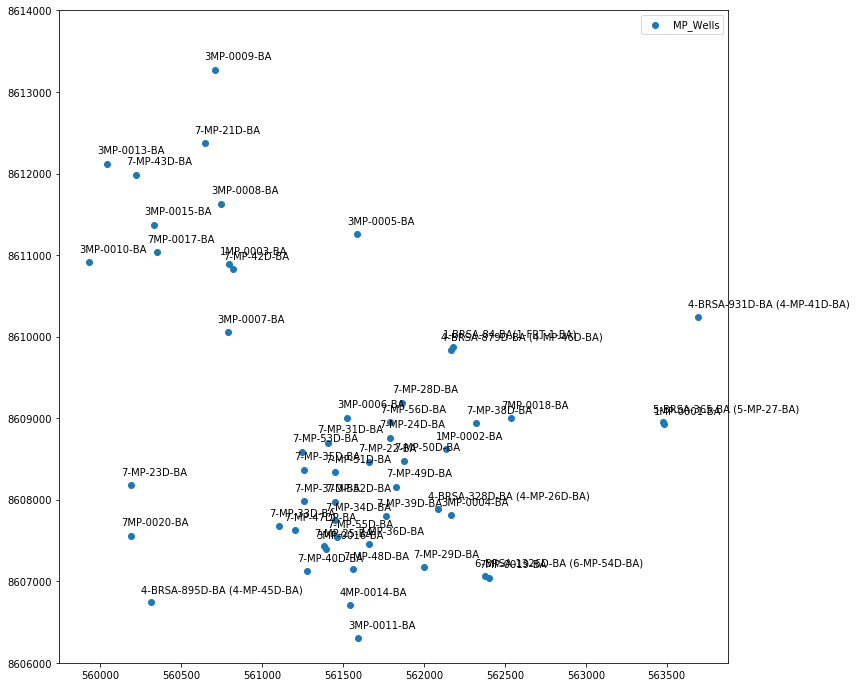

In [4]:
#plotting a map using the well's coordinates:
plt.figure(figsize=(12,12))
plt.scatter(coord[header[1]], coord[header[2]], label='MP_Wells')
#creating a label for each data point:
for i in range(np.shape(data)[0]):
    plt.annotate(coord[header[0]][i], xy=(coord[header[1]][i],coord[header[2]][i]), xytext=[-10,10],
                 textcoords='offset points',
                 #arrowprops=dict(facecolor='black', shrink=0.01)
                )
plt.ylim(8606000, 8614000)
plt.legend()
plt.show()

In [5]:
#setting where to crop the map
ycrop = 8610000
#creating a new dictionary with the values needed
coord_update = {}
update={}
idx = []
for i in range (np.shape(data)[0]):
    if coord[header[2]][i] >= ycrop:
        idx.append(i)
    else:
        coord_update[coord['Well_Name'][i]] = {}
        coord_update[coord['Well_Name'][i]]['UTM_E'] = coord['UTM_E'][i]
        coord_update[coord['Well_Name'][i]]['UTM_N'] = coord['UTM_N'][i]

In [6]:
x = []
y = []
well_name = []
#consulting all the new values of the dictionary
for i in coord_update:
    x.append(coord_update[i]['UTM_E'])
    y.append(coord_update[i]['UTM_N'])
    well_name.append(i)

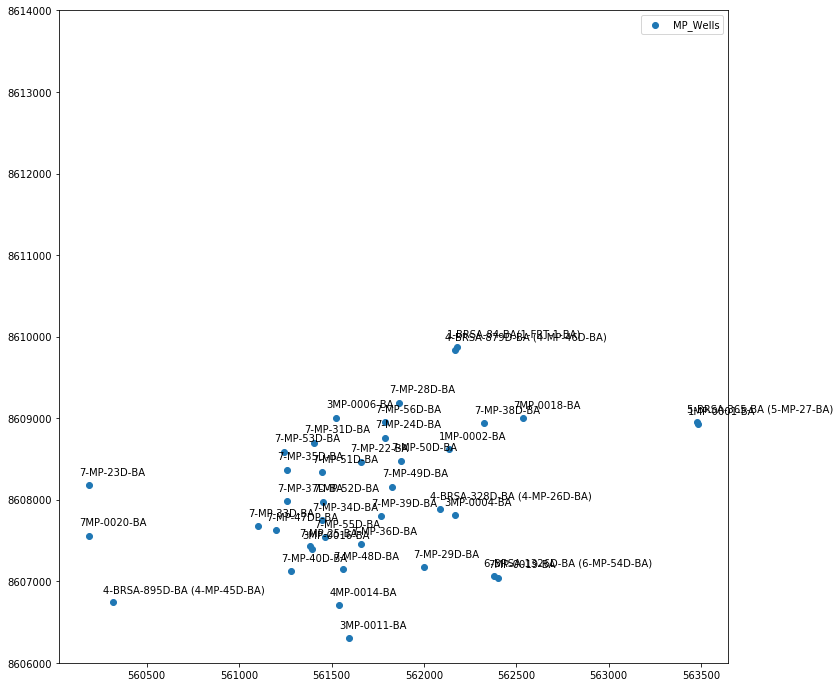

In [7]:
#plotting the new map without well with UTM_N more than 8610000:
plt.figure(figsize=(12,12))
plt.scatter(x, y, label='MP_Wells')
#creating a label for each data point:
for i in range(len(coord_update)):
    plt.annotate(well_name[i], xy=(x[i],y[i]), xytext=[-10,10],
                 textcoords='offset points',
                 #arrowprops=dict(facecolor='black', shrink=0.01)
                )
plt.ylim(8606000, 8614000)
plt.legend()
plt.show()

In [ ]:
print(coord_update['7-MP-28D-BA'])
print(coord_update['7-MP-56D-BA'])

In [ ]:
x2 = (coord_update['7-MP-53D-BA']['UTM_E'] - coord_update['7-MP-56D-BA']['UTM_E'])**2
y2 = (coord_update['7-MP-53D-BA']['UTM_N'] - coord_update['7-MP-56D-BA']['UTM_N'])**2
dist = np.sqrt(x2+y2)
print(dist)

In [ ]:
coord['Well_Name'][2]

In [29]:
# para fazer plots dentro do proprio jupyter sem a necessidade de conexao com a internet:
ply.offline.init_notebook_mode(connected=True)

size = list(np.full(len(coord['Well_Name']), 8))
color = list(np.full(len(coord['Well_Name']), 1))

plot = go.Scatter(x = coord['UTM_E'],
                  y = coord['UTM_N'],
                  mode = 'markers',
                  #marker_color = 'rgb(0, 0, 255)',
                  marker=dict(size=size,
                              color=color),
                  text = coord['Well_Name'])


fig = go.FigureWidget(data=[plot])

teste = fig.data[0]

x = list(teste.x)
y = list(teste.y)

choice = {}
well_name_all = []
utm_E_all = []
utm_N_all = []

def select_point(trace, points, selector):
    #print(selector)
    for i in points.point_inds:
        well_name = coord['Well_Name'][i]
        well_name_all.append(well_name)
        utm_E = coord['UTM_E'][i]
        utm_E_all.append(utm_E)
        utm_N = coord['UTM_N'][i]
        utm_N_all.append(utm_N)
        size[i] = 10
        color[i] = 10
        #print(i)
        
    choice['Well_Name'] = well_name_all
    choice['UTM_E'] = utm_E_all
    choice['UTM_N'] = utm_N_all
    
    fig.update_traces(marker=dict(size=size,
                                  color=color
                                 )
                     )
    #fig.add_trace(go.Scatter(x=choice['UTM_E'], y=choice['UTM_N'], text=choice['Well_Name'],
    #                         mode='markers',
    #                         marker_color='rgb(152, 0, 0)'))
    
    #fig.update_traces(marker_color = 'rgb(0, 255, 0)')
    return choice

teste.on_click(select_point)

fig

FigureWidget({
    'data': [{'marker': {'color': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            …

In [30]:
# para fazer plots dentro do proprio jupyter sem a necessidade de conexao com a internet:
ply.offline.init_notebook_mode(connected=True)

plot = go.Scatter(x = choice['UTM_E'],
                  y = choice['UTM_N'],
                  mode = 'markers',
                  text = choice['Well_Name'])

fig = go.FigureWidget(data=[plot])

fig

FigureWidget({
    'data': [{'mode': 'markers',
              'text': [7-MP-28D-BA, 7-MP-56D-BA, 7-MP-31D-BA, …